In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.metrics import classification_report
data = pd.read_csv('kidney disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [11]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [13]:
NumericalColumns = ['age','bp','al','su','bgr','bu','sc','sod','pot','hemo']
CategoricalColumns = ['rbc','sg','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']

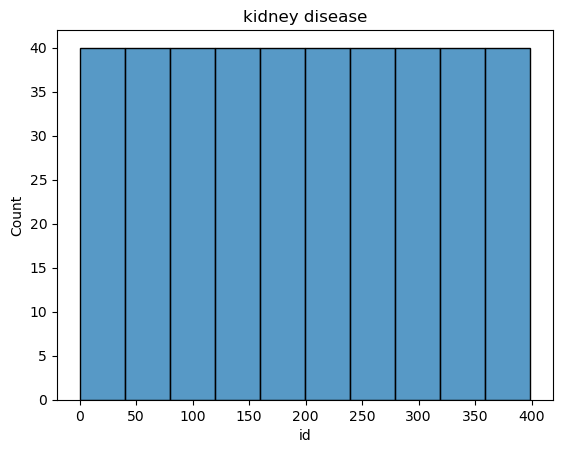

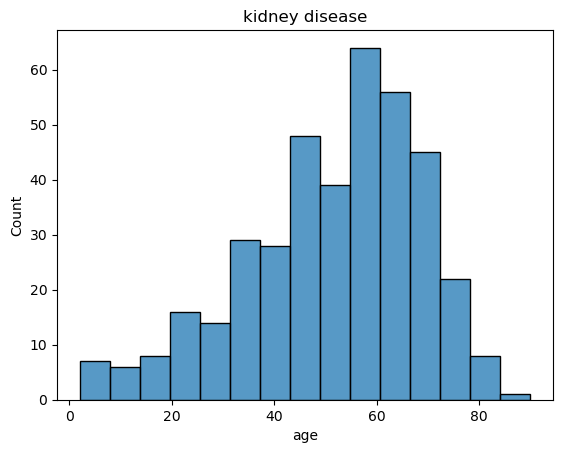

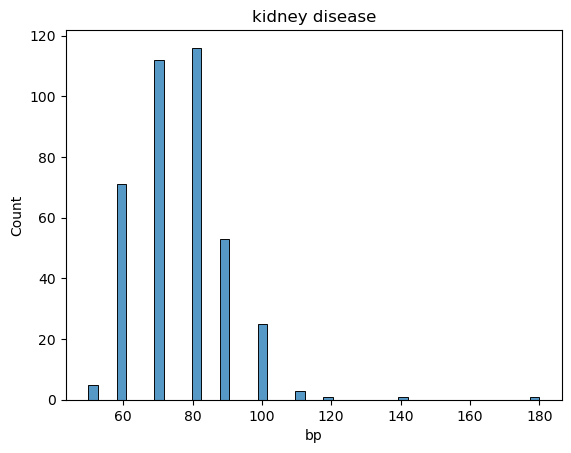

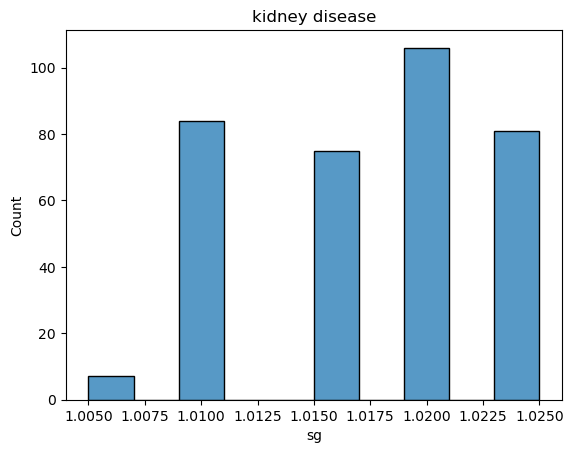

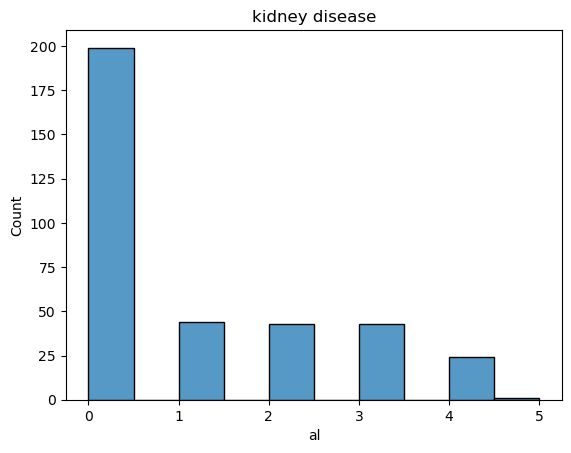

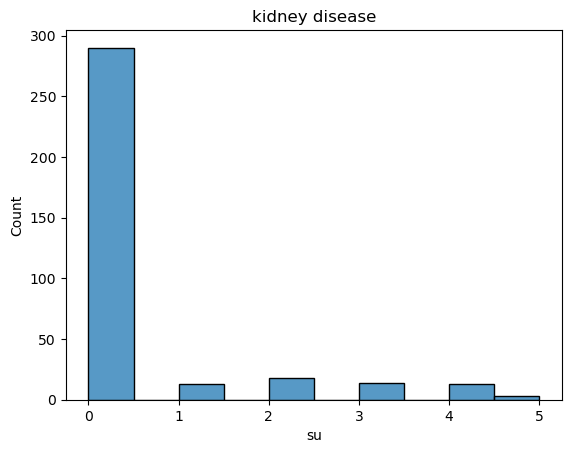

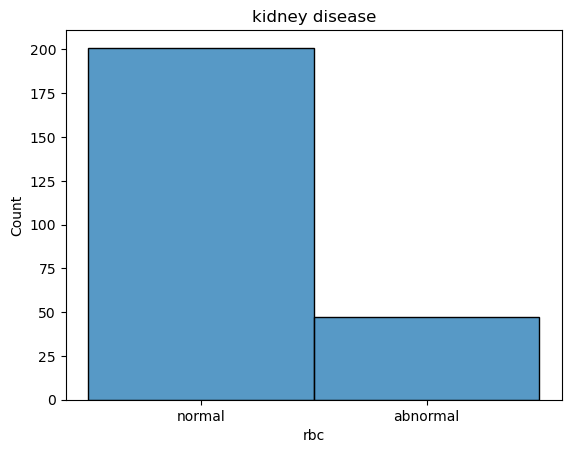

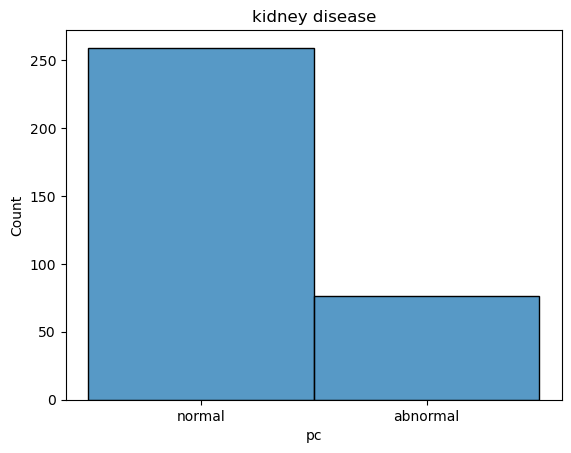

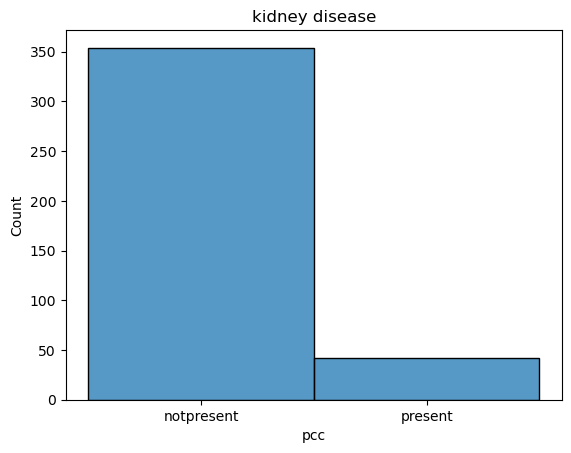

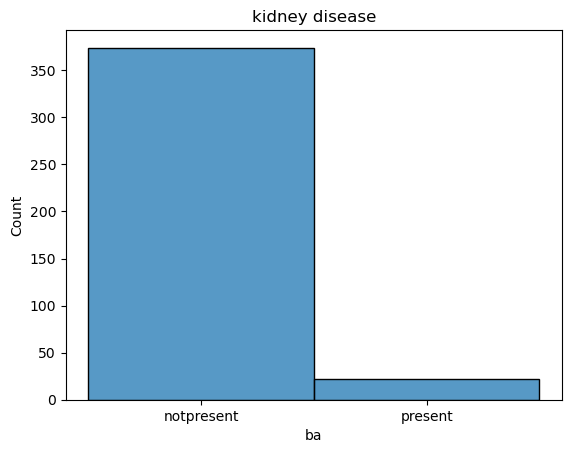

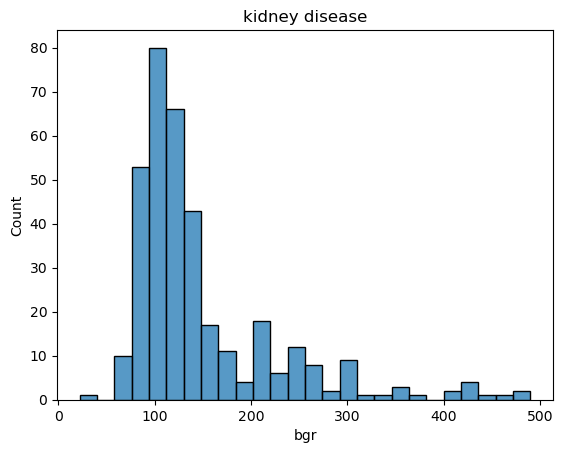

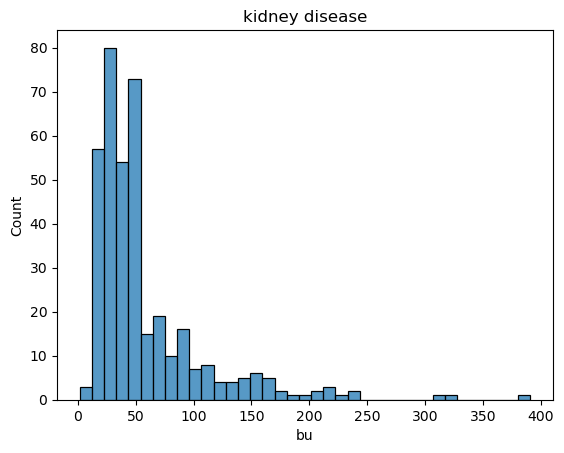

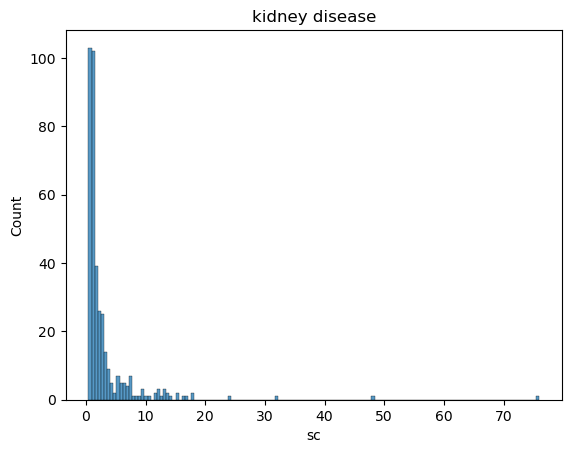

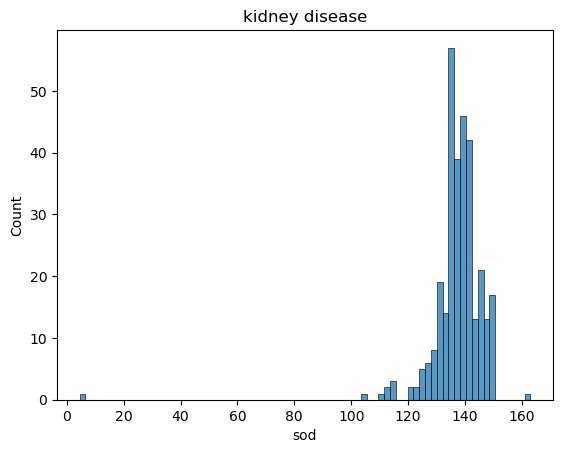

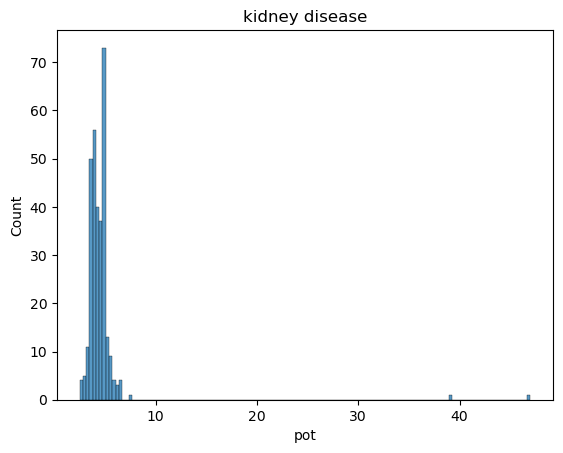

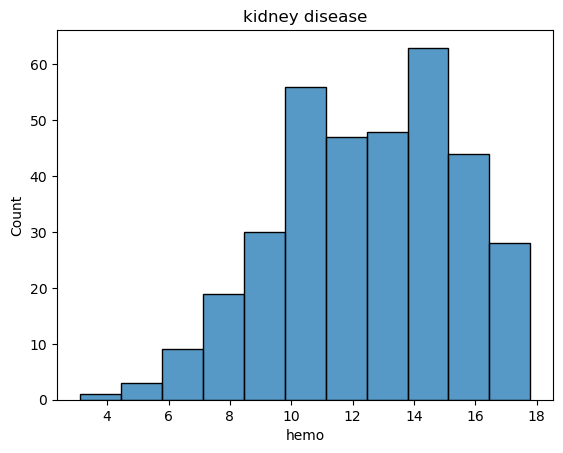

C:\Users\HAPPY\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


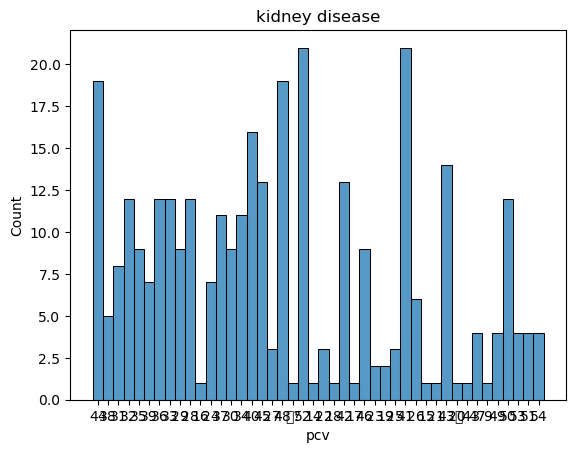

C:\Users\HAPPY\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


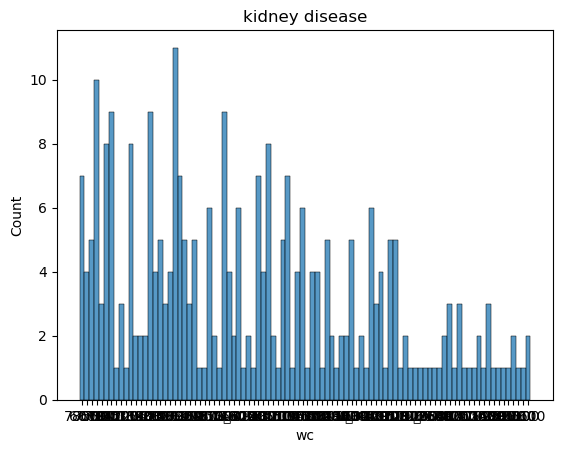

C:\Users\HAPPY\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


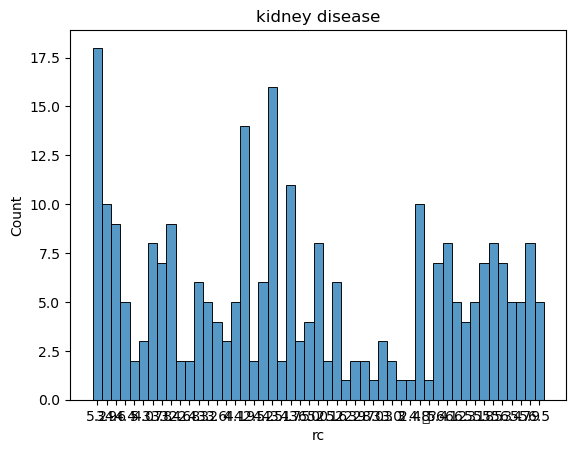

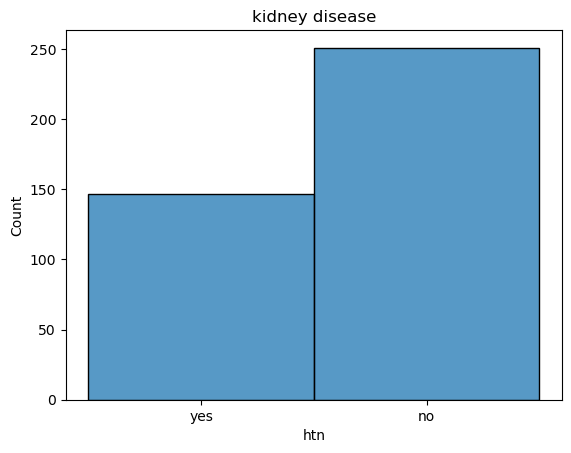

C:\Users\HAPPY\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


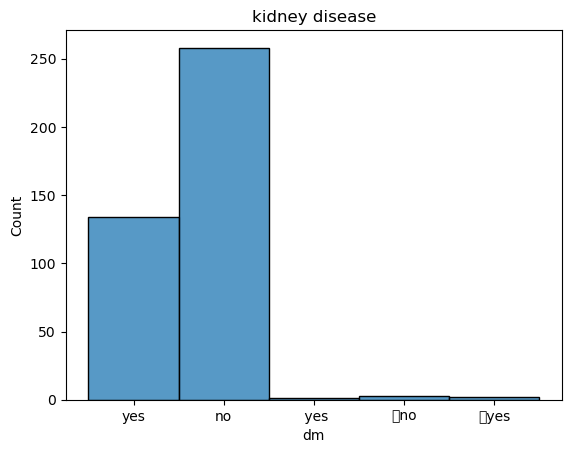

C:\Users\HAPPY\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


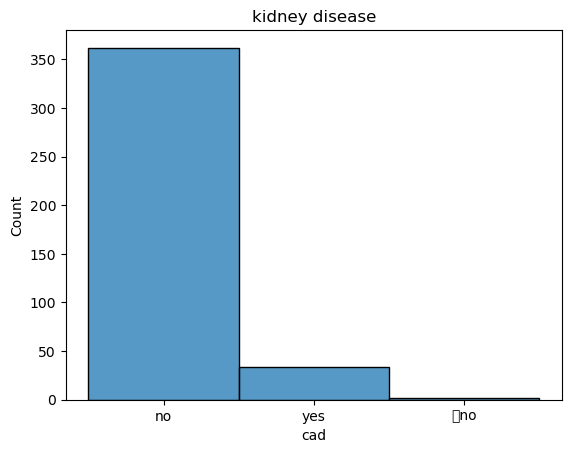

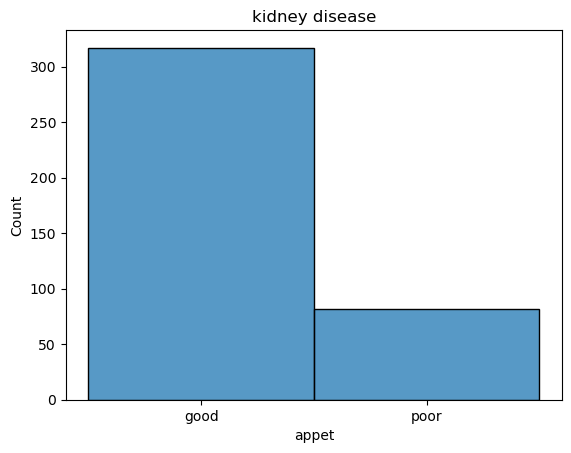

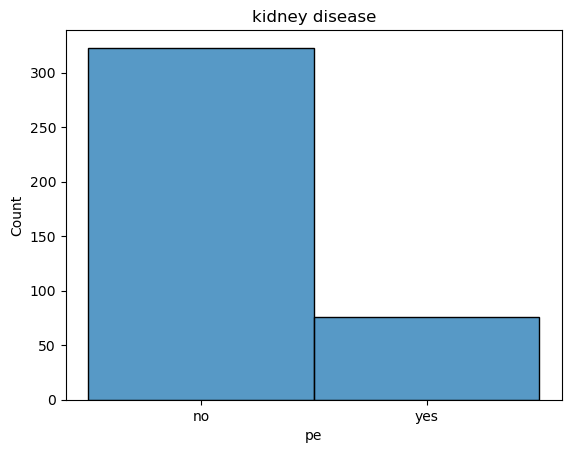

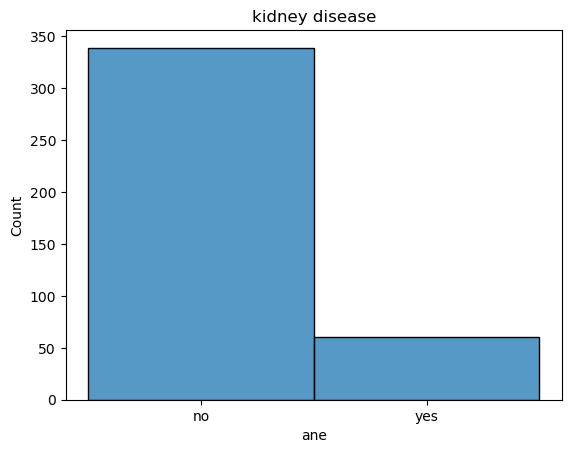

C:\Users\HAPPY\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


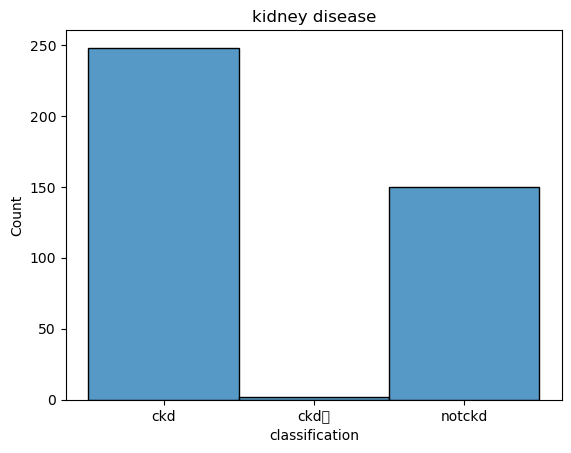

In [25]:
for columnName in data.columns:
    sns.histplot(data[columnName])
    plt.title('kidney disease')
    plt.show()

In [27]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [33]:
data['classification'].replace("ckd\t","ckd",inplace=True)
data['dm'].replace(["\tno","\tyes"," yes"],["no","yes","yes"],inplace=True)
data['cad'].replace(["\tno"],["no"],inplace=True)

C:\Users\HAPPY\AppData\Local\Temp\ipykernel_17980\1134230624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['classification'].replace("ckd\t","ckd",inplace=True)


In [35]:
data['rc'].replace("\t?",np.nan, inplace=True)
data.wc.replace("\t?",np.nan, inplace=True)
data['pcv'].replace(["\t?","\t43"],np.nan, inplace=True)

C:\Users\HAPPY\AppData\Local\Temp\ipykernel_17980\216172662.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rc'].replace("\t?",np.nan, inplace=True)
C:\Users\HAPPY\AppData\Local\Temp\ipykernel_17980\216172662.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [37]:
for columnName in CategoricalColumns:
  data[columnName].fillna(data[columnName].mode()[0], inplace=True)

C:\Users\HAPPY\AppData\Local\Temp\ipykernel_17980\1036479130.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[columnName].fillna(data[columnName].mode()[0], inplace=True)


In [39]:
for columnName in NumericalColumns:
  data[columnName].fillna(data[columnName].mean(), inplace=True)

C:\Users\HAPPY\AppData\Local\Temp\ipykernel_17980\4234235827.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[columnName].fillna(data[columnName].mean(), inplace=True)


In [41]:
data.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [43]:
encodeColumn = ['rbc','pc' ,'pcc' ,'ba' ,'htn' ,'dm' ,'cad' ,'appet' ,'pe' ,'ane']
data = pd.get_dummies(data , columns=encodeColumn , prefix=encodeColumn , drop_first=True)

In [53]:
data['classification'].replace(["ckd","notckd"],[1,0], inplace=True)

In [55]:
data.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,True,True,False,False,True,True,False,False,False,False
1,1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,True,True,False,False,False,False,False,False,False,False
2,2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,True,True,False,False,False,True,False,True,False,True
3,3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,True,False,True,False,True,False,False,True,True,True
4,4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,True,True,False,False,False,False,False,False,False,False


In [57]:
data.classification.value_counts()

classification
1    250
0    150
Name: count, dtype: int64

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [65]:
log = LogisticRegression()
cv_v = cross_val_score(log, X_train, y_train, cv=4)
print(cv_v)
print(cv_v.std())
print(cv_v.mean())

[1.    0.975 1.    1.   ]
0.010825317547305492
0.99375


In [67]:
log.fit(X_train,y_train)

LogisticRegression()

In [69]:
y_pred = log.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

